In [2]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
fashion_minist = tf.keras.datasets.fashion_mnist

In [54]:
(Xtrain, ytrain), (Xtest, ytest) = fashion_minist.load_data()
len(ytrain)

60000

<function matplotlib.pyplot.show(close=None, block=None)>

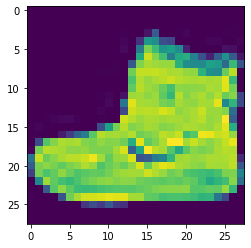

In [16]:
plt.figure()
plt.imshow(Xtrain[0])
plt.show 

In [41]:
Xtrain = Xtrain /255.0
Xtest = Xtest / 255.0
class_names =['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

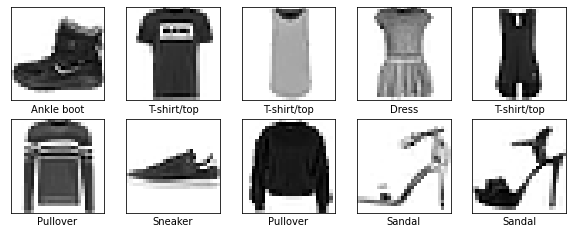

In [44]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xtrain[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[ytrain[i]])
plt.show()

In [62]:
#buil model 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [63]:
#compile model 
model. compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [64]:
#train model 
model.fit(Xtrain, ytrain, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 4.0230 - accuracy: 0.6817
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7046 - accuracy: 0.7559
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5735 - accuracy: 0.8076
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5421 - accuracy: 0.8146
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5157 - accuracy: 0.8222
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5093 - accuracy: 0.8237
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4943 - accuracy: 0.8283
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4845 - accuracy: 0.8310
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4735 - accuracy: 0.8383
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.469

In [58]:
test_loss, test_accuracy = model.evaluate(Xtrain,   ytrain, verbose= 2 )
print("loss: ", test_loss)
print("accuracy: ", test_accuracy)

1875/1875 - 2s - loss: 0.4682 - accuracy: 0.8436
loss:  0.46824711561203003
accuracy:  0.8435999751091003


In [65]:
#predict
probality_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [74]:
predict = probality_model.predict(Xtest)
np.argmax(predict[0])

9